---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [4]:
def plot_feature_importances_ord(clf, feature_names_ord):
    c_features = len(feature_names_ord)
    plt.barh(range(c_features), numpy.sort(clf.feature_importances_))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(numpy.arange(c_features), feature_names_ord)  

In [5]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

fruits = pd.read_table('fruit_data_with_colors.txt')

In [6]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [7]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

In [8]:
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
# X['log_width'] = np.log(X.width)
# X['log_mass'] = np.log(X.mass)
# X['interacton'] = np.log(X.mass/(X.height*X.width))

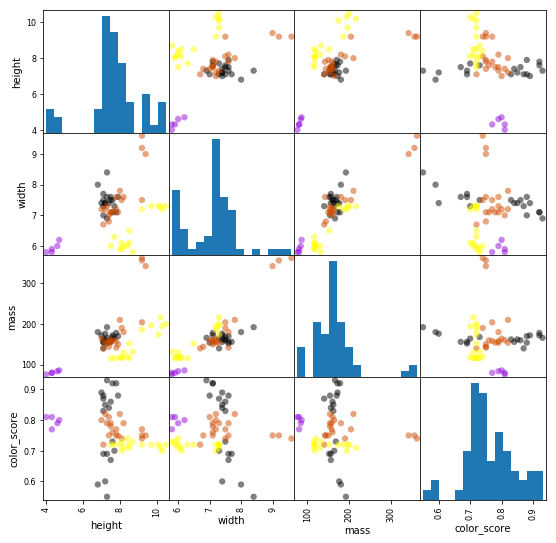

In [9]:
# plotting a scatter matrix
# add legend
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c= y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

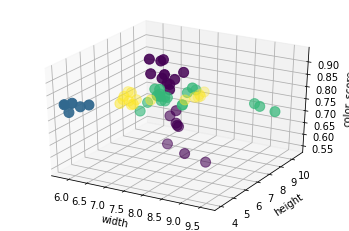

In [10]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['width'], X['height'], X['color_score'], c = y, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [11]:
# For this example, we use the mass, width, and height features of each fruit instance
#X = fruits[['mass', 'width', 'height']]
X = X[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [14]:
knn.score(X_test, y_test)

0.5333333333333333

In [15]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.54545455 0.57894737 0.5       ]
Mean cross-validation score (3-fold): 0.541


#### Confusion matrix - look beyond accuracy

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
knn_predicted = knn.predict(X_test)

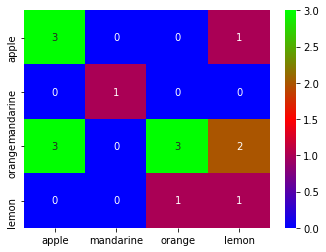

In [18]:

import seaborn as sns
confusion_mc = confusion_matrix(y_test, knn_predicted)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,4)], columns = [i for i in range(0,4)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm,cmap="brg", annot=True,xticklabels=['apple', 'mandarine','orange','lemon'], \
            yticklabels=['apple', 'mandarine','orange','lemon'])

#### Classification report - look beyond accuracy

In [19]:
print(classification_report(y_test, knn_predicted,target_names=['apple', 'mandarine','orange','lemon']))

              precision    recall  f1-score   support

       apple       0.50      0.75      0.60         4
   mandarine       1.00      1.00      1.00         1
      orange       0.75      0.38      0.50         8
       lemon       0.25      0.50      0.33         2

   micro avg       0.53      0.53      0.53        15
   macro avg       0.62      0.66      0.61        15
weighted avg       0.63      0.53      0.54        15



### Use the trained k-NN classifier model to classify new, previously unseen objects

In [20]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [21]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

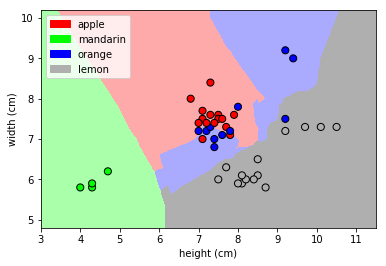

In [22]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

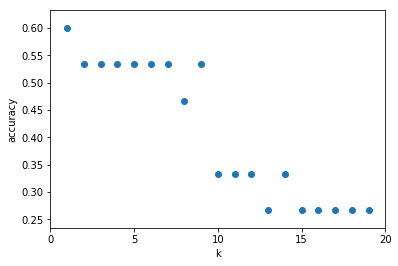

In [23]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

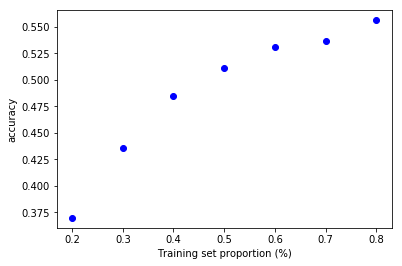

In [24]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

### Regression with kNN

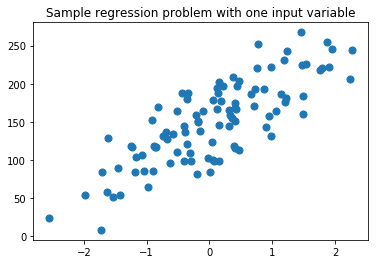

In [25]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))


[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
R-squared test score: 0.425


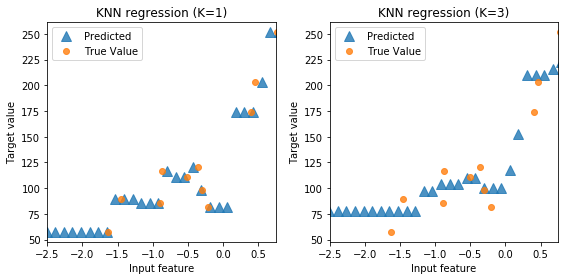

In [27]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

## Linear models for regression

## Linear regression: real crime dataset 

In [28]:
# Communities and Crime dataset load
from adspy_shared_utilities import load_crime_dataset
(X_crime, y_crime) = load_crime_dataset()

In [29]:
X_crime.columns

Index(['population', 'householdsize', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam',
       'PctLargHouseOccup', 'PersPerOccupHous', 'Pe

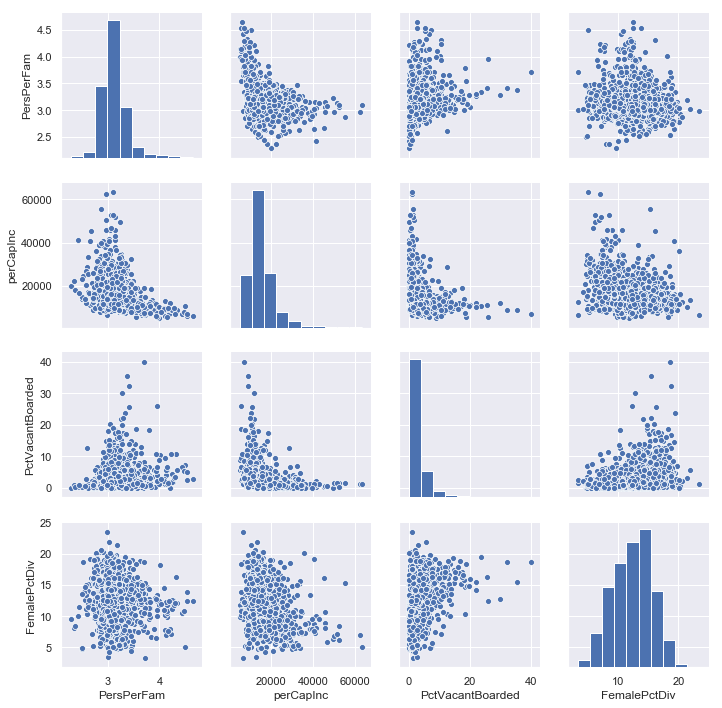

In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize':(9,6)})
sns.pairplot(X_crime[['PersPerFam', 'perCapInc', 'PctVacantBoarded','FemalePctDiv']])

In [31]:
# OLS (Ordinary Least Squares)
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.130672602188
linear model coeff:
[ 1.61892346e-03 -9.43009110e+01  1.36067510e+01 -3.13380670e+01
 -8.15482721e-02 -1.69455128e+01 -2.42730375e-03  1.53013232e+00
 -1.39193248e-02 -7.72112833e+00  2.28112354e+01 -5.65708295e+00
  9.34751364e+00  2.06969566e-01 -7.43413626e+00  9.65856476e-03
  4.38030290e-03  4.79754625e-03 -4.46469212e+00 -1.60907140e+01
  8.82778012e+00 -5.06734503e-01 -1.42198055e+00  8.17551991e+00
 -3.87048268e+00 -3.54209213e+00  4.48758304e+00  9.30645715e+00
  1.73644996e+02  1.18220766e+01  1.51120836e+02 -3.29613007e+02
 -1.35343395e+02  6.95380108e-01 -2.38369008e+01  2.77038981e+00
  3.82248925e-01  4.38813358e+00 -1.06410851e+01 -4.92294176e-03
  4.14031827e+01 -1.16206866e-03  1.18568968e+00  1.75418465e+00
 -3.68283678e+00  1.59679443e+00 -8.42180230e+00 -3.79703897e+01
  4.74076990e+01 -2.50768374e+01 -2.88246410e-01 -3.65633234e+01
  1.89516080e+01 -4.53336736e+01  6.82698598e+02  1.04478671e+02
 -3.28575414e

In [32]:
### Ridge regression
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.423035846225
ridge regression linear model coeff:
[ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 -1.12903533e+01 -4.69567413e-03
  4.27046505e+01 -1.22507167e-03  1.40795790e+00  9.35041855e-01
 -3.00464253e+00  1.12390514e+00 -1.82487653e+01 -1.54653407e+01
  2.41917002e+01 -1.32497562e+01 -4.20113118e-01 -3.59710660e+01
  1.29786751e+01 -2.80765995e+01  4.38513476

In [33]:
#### Ridge regression with feature normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044163
ridge regression linear model coeff:
[  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.3572

In [34]:
### Lasso regression with regularisation
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.612061998579
lasso regression linear model coeff:
[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826    

## Linear models for classification

### Logistic regression
#### Logistic regression on fruit dataset

In [35]:
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)


In [36]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_fruits,y_fruits,random_state = 0)

clf = LogisticRegression(C=100).fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.47


classification report:
               precision    recall  f1-score   support

       apple       0.25      0.50      0.33         4
    mandarin       1.00      1.00      1.00         1
      orange       0.50      0.25      0.33         8
       lemon       1.00      1.00      1.00         2

   micro avg       0.47      0.47      0.47        15
   macro avg       0.69      0.69      0.67        15
weighted avg       0.53      0.47      0.47        15



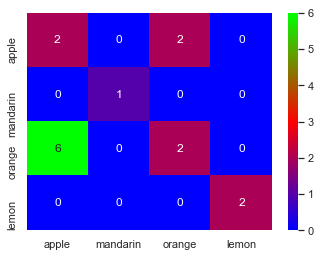

In [37]:
clf_predicted = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print('classification report:\n',classification_report(y_test, clf_predicted,target_names=['apple', 'mandarin','orange','lemon']))

confusion_mc = confusion_matrix(y_test, clf_predicted)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,4)], columns = [i for i in range(0,4)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm,cmap="brg", annot=True,xticklabels=['apple', 'mandarin','orange','lemon'], \
            yticklabels=['apple', 'mandarin','orange','lemon'])

## Decision Trees

In [38]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree


from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits,
                                                   y_fruits,
                                                   random_state = 0)

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


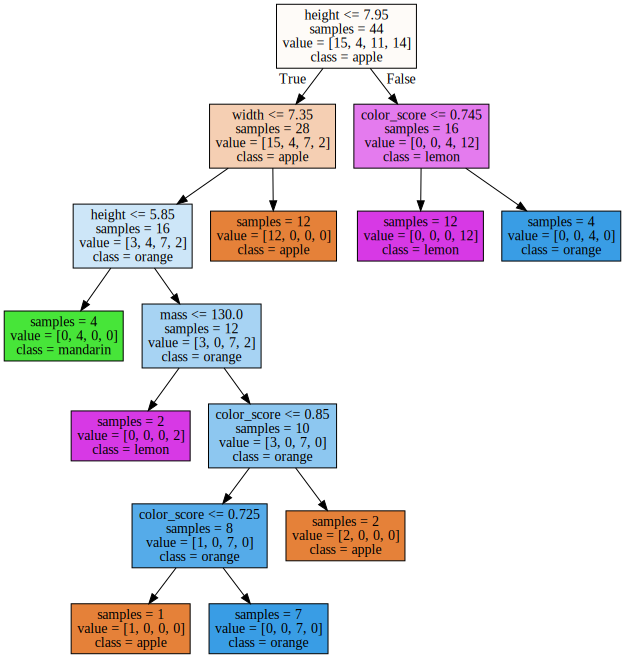

In [39]:
plot_decision_tree(clf,['height', 'width', 'mass', 'color_score'], ['apple', 'mandarin','orange','lemon'])

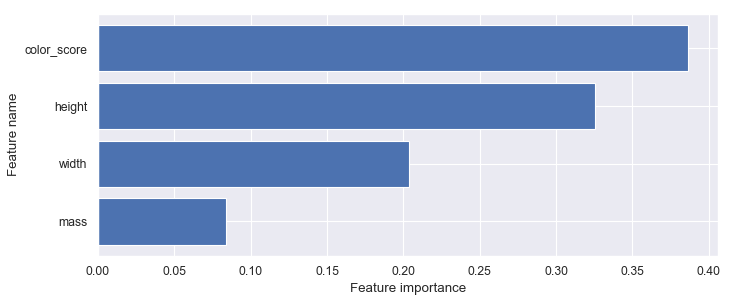

In [40]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
feature_names_ord = ['mass','width','height', 'color_score']
plot_feature_importances_ord(clf, feature_names_ord)
plt.show()

#print('Feature importances: {}'.format(clf.feature_importances_))

## Ensembles of Decision Trees

### Random Forests 

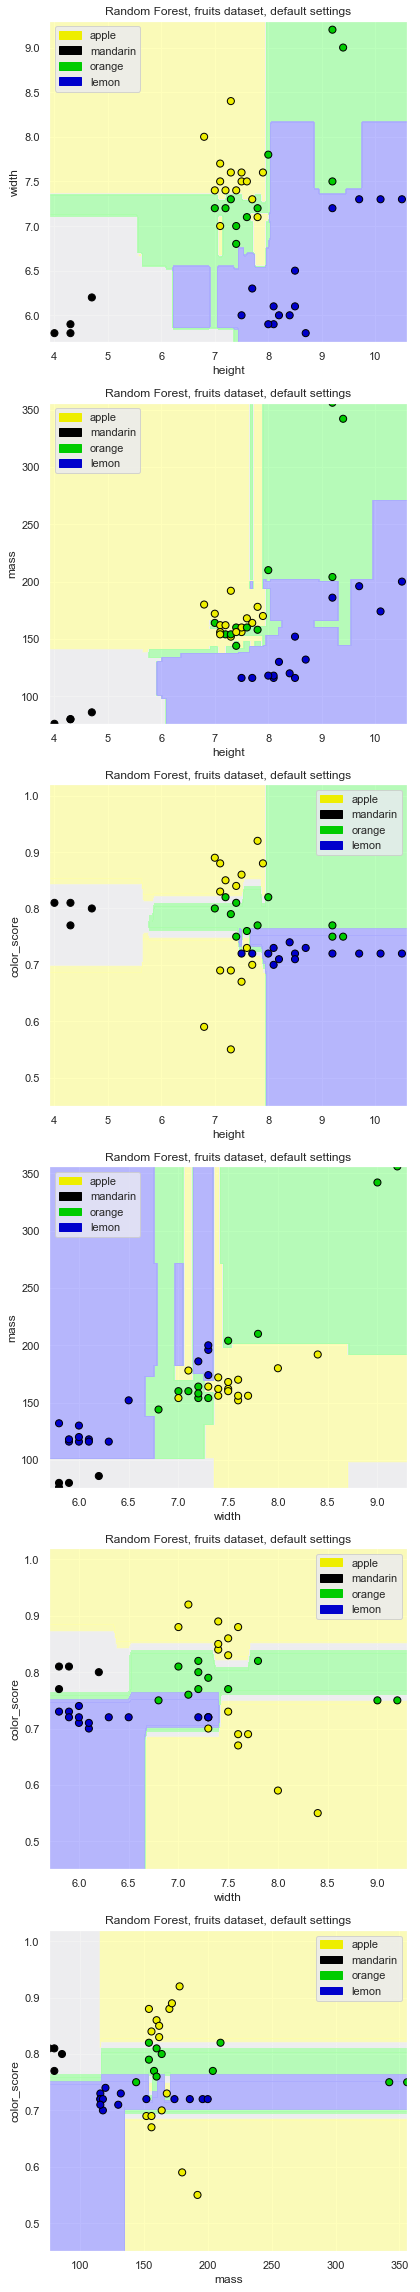

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

In [42]:
print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
    mandarin       1.00      1.00      1.00         1
      orange       1.00      0.62      0.77         8
       lemon       0.40      1.00      0.57         2

   micro avg       0.80      0.80      0.80        15
   macro avg       0.85      0.91      0.84        15
weighted avg       0.92      0.80      0.82        15



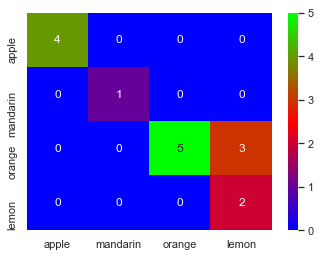

In [43]:
clf_predicted = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print('classification report:\n',classification_report(y_test, clf_predicted,target_names=['apple', 'mandarin','orange','lemon']))

import seaborn as sns
confusion_mc = confusion_matrix(y_test, clf_predicted)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,4)], columns = [i for i in range(0,4)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm,cmap="brg", annot=True, xticklabels=['apple', 'mandarin','orange','lemon'], \
            yticklabels=['apple', 'mandarin','orange','lemon'])

#### Gradient boosted decision trees on the fruit dataset

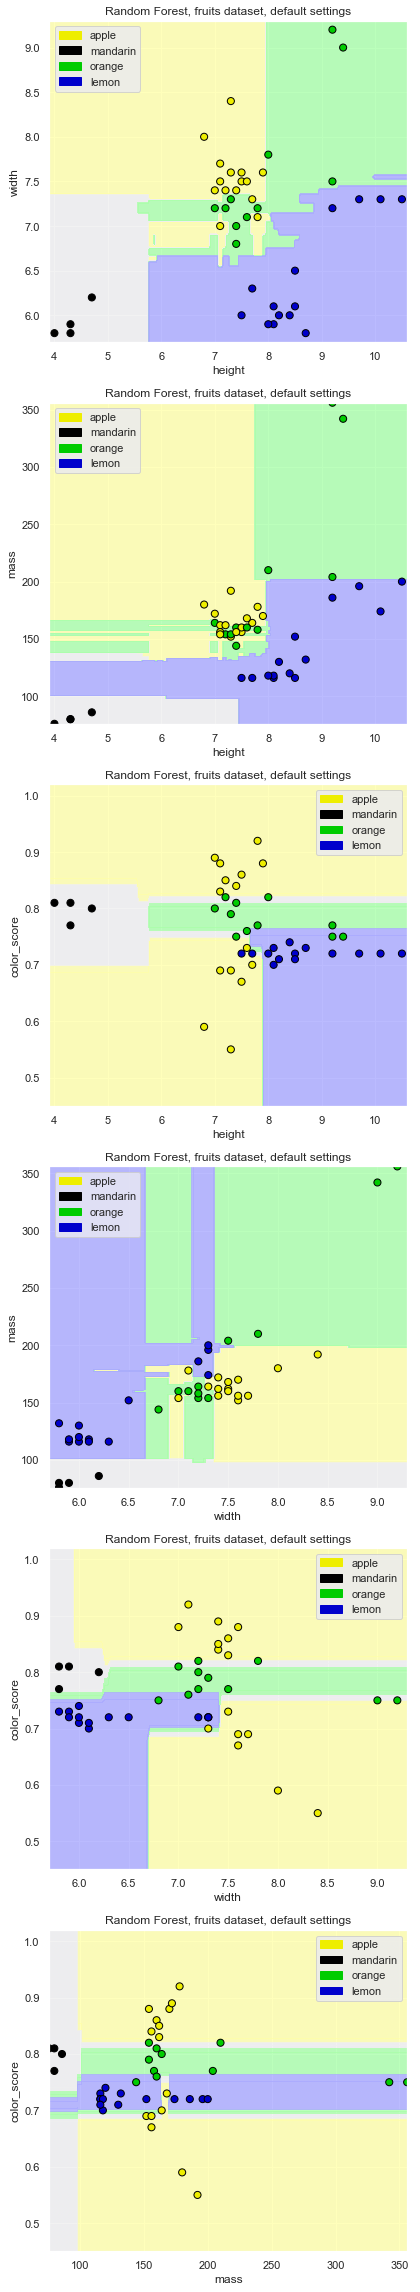

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf_grad = GradientBoostingClassifier(max_depth=3, subsample=0.7).fit(X, y)
    plot_class_regions_for_classifier_subplot(clf_grad, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf_grad = GradientBoostingClassifier(max_depth=3, subsample=0.7).fit(X_train, y_train)

In [45]:
print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf_grad.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf_grad.score(X_test, y_test)))

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
    mandarin       1.00      1.00      1.00         1
      orange       1.00      0.62      0.77         8
       lemon       0.40      1.00      0.57         2

   micro avg       0.80      0.80      0.80        15
   macro avg       0.85      0.91      0.84        15
weighted avg       0.92      0.80      0.82        15



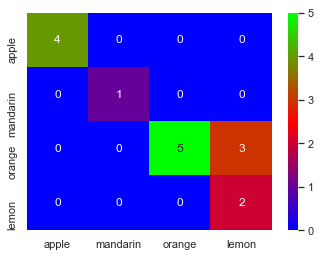

In [46]:
clf_grad_predicted = clf_grad.predict(X_test)

print('classification report:\n',classification_report(y_test, clf_grad_predicted,target_names=['apple', 'mandarin','orange','lemon']))

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
confusion_mc = confusion_matrix(y_test, clf_grad_predicted)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,4)], columns = [i for i in range(0,4)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm,cmap="brg", annot=True, xticklabels=['apple', 'mandarin','orange','lemon'], \
            yticklabels=['apple', 'mandarin','orange','lemon'])

## Neural networks

#### Activation functions

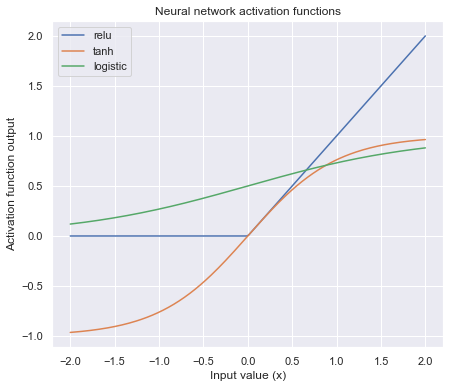

In [47]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

### NN 4 Classification - fruit data

In [48]:
from sklearn.neural_network import MLPClassifier

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(), random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 20], solver='lbfgs',activation = 'relu',learning_rate='adaptive', 
                      alpha = 0.001, random_state = 0).fit(X_train, y_train)

print('MLPClassifier, Fruit dataset, default settings')
print('Accuracy of MLPClassifier classifier on training set: {:.2f}'
     .format(nnclf.score(X_train, y_train)))
print('Accuracy of MLPClassifier classifier on test set: {:.2f}'
     .format(nnclf.score(X_test, y_test)))

MLPClassifier, Fruit dataset, default settings
Accuracy of MLPClassifier classifier on training set: 0.84
Accuracy of MLPClassifier classifier on test set: 0.53


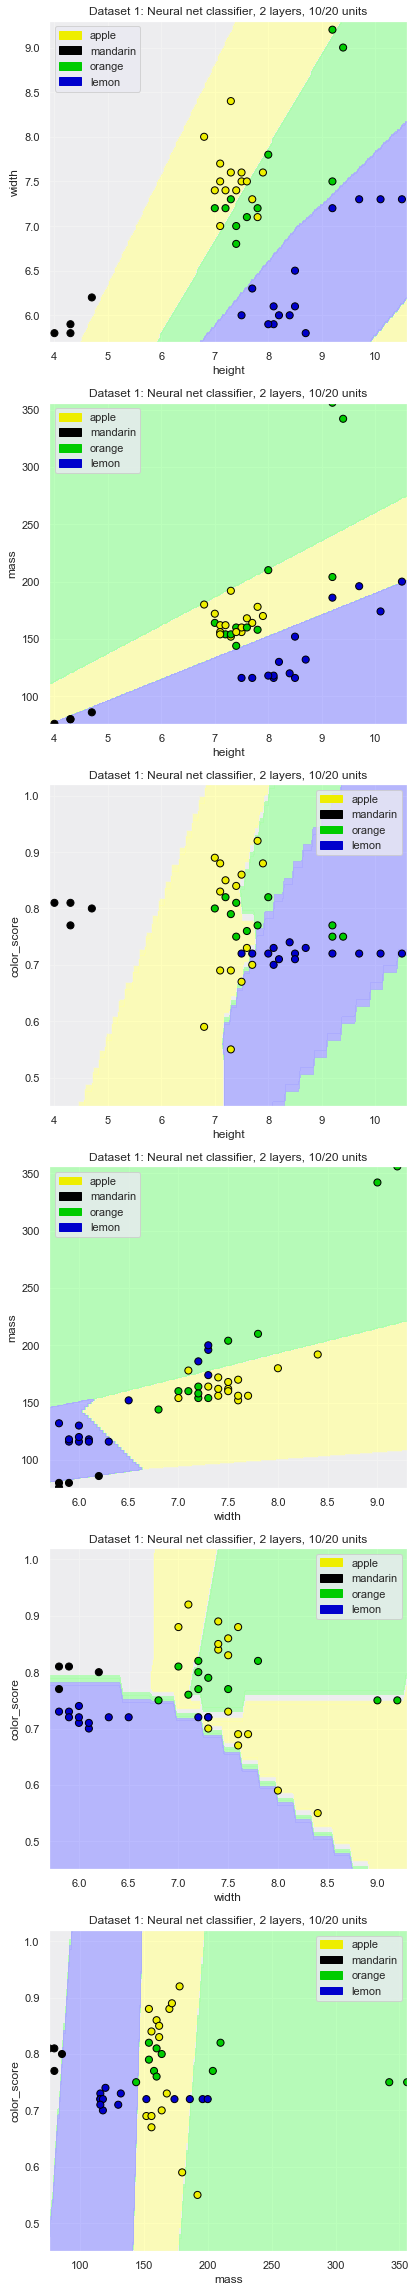

In [50]:
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

title = 'Dataset 1: Neural net classifier, 2 layers, 10/20 units'
for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
#     nnclf = MLPClassifier(hidden_layer_sizes = [10,10,10],activation = 'relu', solver='lbfgs',
#                          random_state = 0).fit(X, y) 
# note: above model achieves same accuracy but is more complex, through hyperpram tuning can have a smaller model still reach result 
    nnclf = MLPClassifier(hidden_layer_sizes = [10, 20], solver='lbfgs',activation = 'relu',learning_rate='adaptive', 
                      alpha = 0.001, random_state = 0).fit(X,y)
    plot_class_regions_for_classifier_subplot(nnclf, X, y, None,
                                             None,title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

### NN 4 Regression - syntheic data (as used before) 

In [51]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

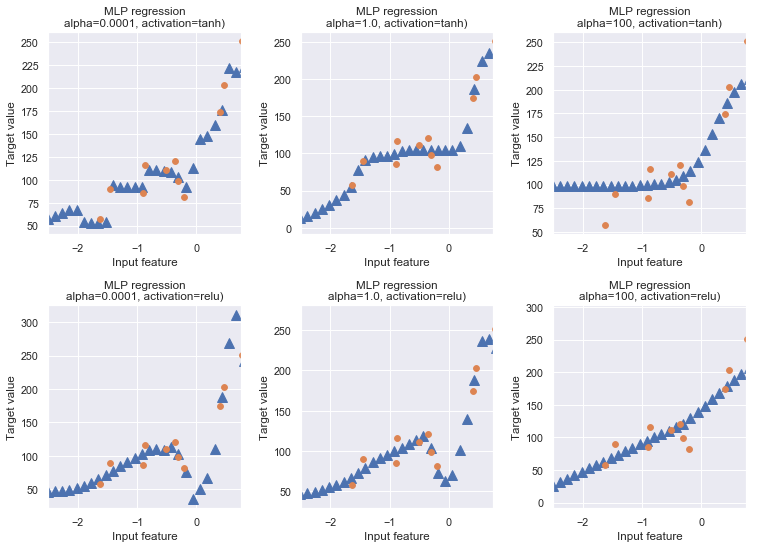

In [52]:
fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)
scores, r2 = [], []
for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        scores.append(mlpreg.score(X_test, y_test))
        r2.append(r2_score(y_test, mlpreg.predict(X_test)))
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

In [53]:
scores

[-0.24813223953298744,
 -0.3002467922501666,
 -0.07895574492287549,
 -0.12569522260708177,
 -0.29500858578204925,
 -0.4262115926589418]